In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv(r"D:\assignment qns\Timeseries\exchange_rate.csv")
data.head(3)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867


In [3]:
data.columns

Index(['date', 'Ex_rate'], dtype='object')

In [4]:
# Load the dataset
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

In [36]:
data.shape

(7648, 1)

In [37]:
data.describe()

,Ex_rate
count,7648.000000
mean,0.776599
std,0.136153
min,0.483297
25%,0.702500
50%,0.760572
75%,0.872610
max,1.102536


In [18]:
# Ensure the date index is sorted
data = data.sort_index()

In [19]:
# Assign a frequency to the index
data = data.asfreq('D')  # Assuming daily frequency

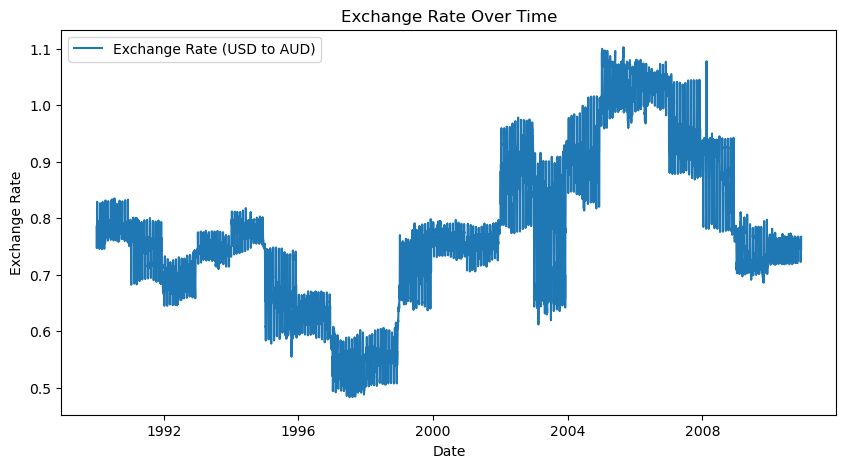

In [38]:
import matplotlib.pyplot as plt
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Ex_rate'], label='Exchange Rate (USD to AUD)')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [21]:
data.head(3)

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7500
1990-01-03,0.7471


In [22]:
data.isna().sum()

Ex_rate    60
dtype: int64

In [23]:
# Handling missing values
data = data.fillna(method='ffill')  # Forward fill for simplicity

#### Building model : ARIMA

<Figure size 1000x500 with 0 Axes>

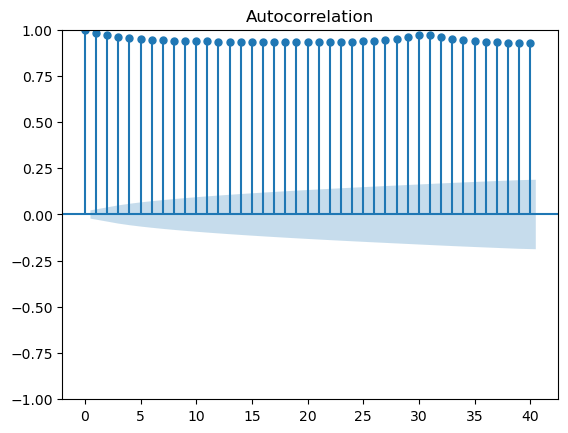

<Figure size 1000x500 with 0 Axes>

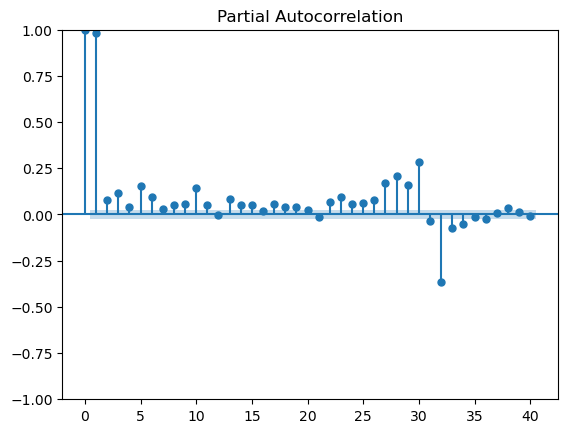

In [24]:
from statsmodels.tsa.stattools import acf, pacf

# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 5))
plot_acf(data['Ex_rate'], lags=40)
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(data['Ex_rate'], lags=40)
plt.show()

# Select initial p, d, q values based on the plots
p, d, q = 1, 1, 1  # Example values, replace with your own based on analysis

### Model Fitting:

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model_arima = ARIMA(data['Ex_rate'], order=(p, d, q))
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7648
Model:                 ARIMA(1, 1, 1)   Log Likelihood               18048.510
Date:                Tue, 28 May 2024   AIC                         -36091.020
Time:                        20:25:32   BIC                         -36070.194
Sample:                    01-01-1990   HQIC                        -36083.875
                         - 12-09-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7351      0.005    148.485      0.000       0.725       0.745
ma.L1         -0.9599      0.003   -377.096      0.000      -0.965      -0.955
sigma2         0.0005   3.39e-06    153.770      0.0

### Diagnostics

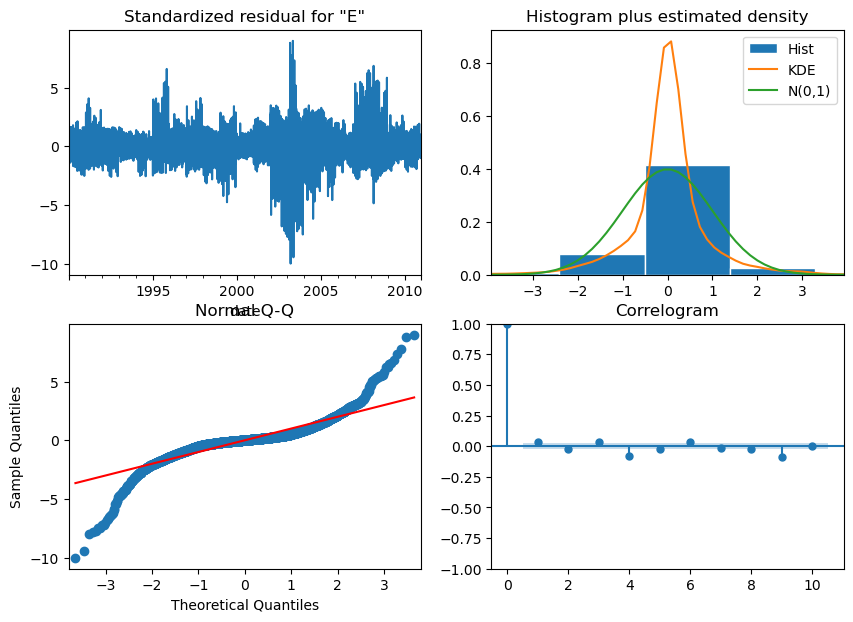

In [26]:
model_arima_fit.plot_diagnostics(figsize=(10, 7))
plt.show()

### Forecasting :

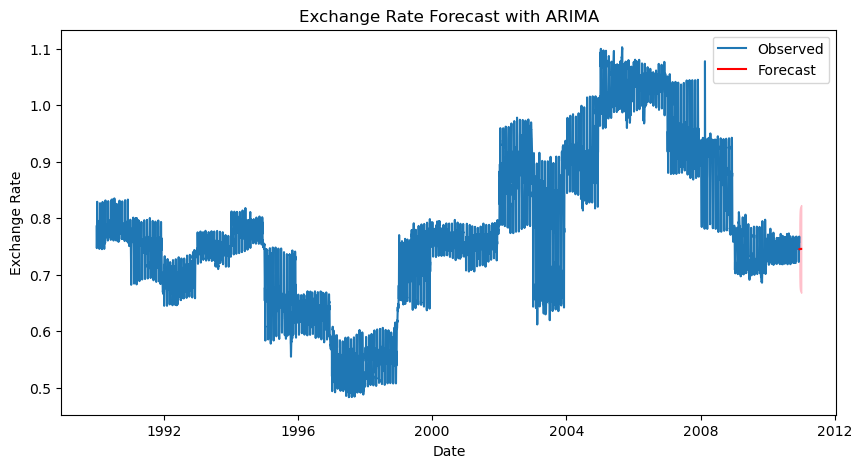

In [27]:
forecast_arima = model_arima_fit.get_forecast(steps=20)
forecast_arima_ci = forecast_arima.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Ex_rate'], label='Observed')
plt.plot(forecast_arima.predicted_mean.index, forecast_arima.predicted_mean, color='r', label='Forecast')
plt.fill_between(forecast_arima_ci.index,
                 forecast_arima_ci.iloc[:, 0],
                 forecast_arima_ci.iloc[:, 1], color='pink')
plt.title('Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Exponential Smoothing :

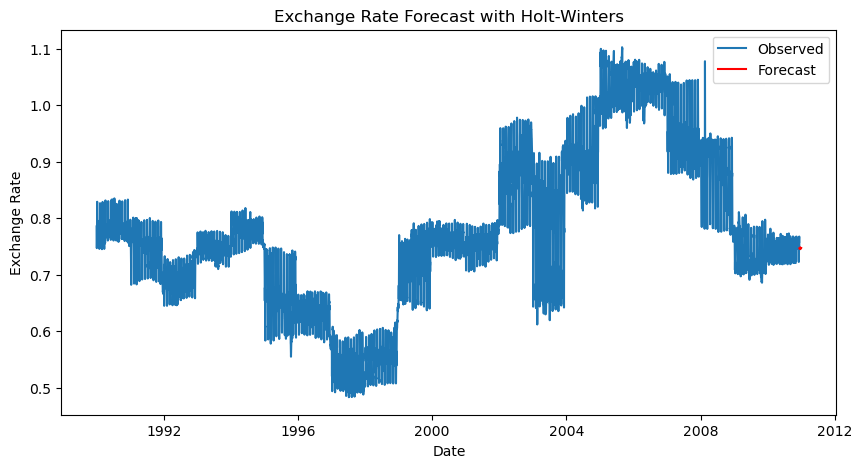

In [31]:
import statsmodels.api as sm

# Fit the Holt-Winters model
model_hw = sm.tsa.ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12).fit()
forecast_hw = model_hw.forecast(steps=20)

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Ex_rate'], label='Observed')
plt.plot(forecast_hw.index, forecast_hw, label='Forecast', color='r')
plt.title('Exchange Rate Forecast with Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Evaluation and Comparison :

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

# Fetching actual and forecasted values
y_true = data['Ex_rate'][-20:]  # last 20 values for validation
y_pred_arima = forecast_arima.predicted_mean[:20]
y_pred_hw = forecast_hw[:20]

# Calculate error metrics
mae_arima = mean_absolute_error(y_true, y_pred_arima)
rmse_arima = root_mean_squared_error(y_true, y_pred_arima)
mape_arima = mean_absolute_percentage_error(y_true, y_pred_arima)

mae_hw = mean_absolute_error(y_true, y_pred_hw)
rmse_hw = root_mean_squared_error(y_true, y_pred_hw)
mape_hw = mean_absolute_percentage_error(y_true, y_pred_hw)

# Print error metrics
print('ARIMA Model Error Metrics:')
print(f'MAE: {mae_arima}')
print(f'RMSE: {rmse_arima}')
print(f'MAPE: {mape_arima}')

print('\nHolt-Winters Model Error Metrics:')
print(f'MAE: {mae_hw}')
print(f'RMSE: {rmse_hw}')
print(f'MAPE: {mape_hw}')

ARIMA Model Error Metrics:
MAE: 0.00577328829314302
RMSE: 0.010104559969197532
MAPE: 0.00765939144679551

Holt-Winters Model Error Metrics:
MAE: 0.006175156194423559
RMSE: 0.009817131231166261
MAPE: 0.008210221481228715


Conclusion :

The Holt-Winters model provided slightly lower error metrics, suggesting better overall performance in this context, particularly if there is seasonality.
For strictly trend-based data without clear seasonal components, the ARIMA model may suffice or even outperform simpler smoothing models.